## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
from math import pi, sin, cos, sqrt, asin

In [2]:
from IPython.display import display, HTML
HTML("""<script>trust_notebook=true</script>""")

In [3]:
df = pd.read_csv("dataset/earthquake_clean.csv")
df

,date,timestamp,latitude,longitude,depth,magnitude,location
0,2008-11-01,21:02:43.058000,-9.18,119.06,10,4.9,Sumba Region
1,2008-11-01,20:58:50.248000,-6.55,129.64,10,4.6,Banda Sea
2,2008-11-01,17:43:12.941000,-7.01,106.63,121,3.7,Java
3,2008-11-01,16:24:14.755000,-3.30,127.85,10,3.2,Seram
4,2008-11-01,16:20:37.327000,-6.41,129.54,70,4.3,Banda Sea
...,...,...,...,...,...,...,...
92882,2023-01-26,02:25:09.288000,3.24,127.18,10,4.0,Talaud Islands
92883,2023-01-26,02:15:03.893000,2.70,127.10,10,3.9,Northern Molucca Sea
92884,2023-01-26,01:57:08.885000,-7.83,121.07,10,3.8,Flores Sea
92885,2023-01-26,01:46:21.009000,3.00,127.16,10,4.1,Northern Molucca Sea


In [4]:
# average depth and magnitude
avg_depth = df["depth"].mean().round(2)
print(f"Average Depth: {avg_depth}")

avg_magnitude = df["magnitude"].mean().round(2)
print(f"Average Magnitude: {avg_magnitude}")

Average Depth: 49.01
Average Magnitude: 3.59


In [5]:
# largest depth and magnitude
lg_depth = df["depth"].max()
print(f"Largest Depth: {lg_depth}")

lg_magnitude = df["magnitude"].max()
print(f"Largest Magnitude: {lg_magnitude}")

print("----")

# lowest depth and magnitude
sm_depth = df["depth"].min()
print(f"Lowest Depth: {sm_depth}")

sm_magnitude = df["magnitude"].min()
print(f"Lowest Magnitude: {sm_magnitude}")

Largest Depth: 750
Largest Magnitude: 7.9
----
Lowest Depth: 2
Lowest Magnitude: 1.0


In [6]:
# count of magnitude intensities
df_mag = pd.DataFrame({"magnitude old" : df["magnitude"], "Magnitude" : df["magnitude"].apply(np.floor)})
mag_count = df_mag.groupby("Magnitude").size().reset_index(name="Number of Earthquakes")
mag_count

,Magnitude,Number of Earthquakes
0,1.0,1093
1,2.0,20682
2,3.0,40780
3,4.0,25256
4,5.0,4670
5,6.0,367
6,7.0,39


In [7]:
# count of earthquake locations
df_loc = pd.DataFrame({"Locations" : df["location"]})
loc_count = df_loc.groupby("Locations").size().reset_index(name="Number of Earthquakes")
loc_count

,Locations,Number of Earthquakes
0,Arafura Sea,7
1,Aru Islands Region,137
2,Bali Region,1374
3,Bali Sea,686
4,Banda Sea,5003
5,Borneo,197
6,Buru,95
7,Celebes Sea,525
8,Ceram Sea,1535
9,East of Philippine Islands,12


In the next part, what we're doing is figuring out the most farthest and closest earthquakes in the region. To do this, I decided to use this [quora post](https://www.quora.com/Where-exactly-is-the-center-of-Indonesia-latitude-longitude-wise) to easily just figure out the center of Indonesia and we can then subset which earthquakes are the farthest and closest from this center. The latitude and longitude for this center is in: (-2.600029, 118.015776).

Next, after researching a bit more on how to exactly mathematically calculate this, I came across the Haversine formula, which determines the great-circle distance between two points on a sphere, in this case Earth, given their latitudes and longitudes. The Haversine formula is as follows:

$$ d = 2r \cdot \arcsin\left(\sqrt{\sin^2\left(\frac{\phi_2 - \phi_1}{2}\right) + \cos(\phi_1)\cos(\phi_2)\sin^2\left(\frac{\lambda_2 - \lambda_1}{2}\right)}\right) $$

where:
- r is Earth's radius (approximately 6,371 km)
- $\phi_1$ and $\phi_2$ are the latitudes of point 1 and point 2 in radians
- $\lambda_1$ and $\lambda_2$ are the longitudes of point 1 and point 2 in radians

In [8]:
def radians(degrees):
  return degrees * (pi/180)

def haversine(lat, lon):
  center_lat = radians(-2.600029)
  center_lon = radians(118.015776)
  curr_lat = radians(lat)
  curr_lon = radians(lon)
  
  r = 6371

  diffLat = center_lat - curr_lat
  diffLon = center_lon - curr_lon

  inner_formula = (sin(diffLat/2) * sin(diffLat/2)) + (cos(center_lat) * cos(curr_lat) * (sin(diffLon/2) * sin(diffLon/2)))
  d = 2 * r * asin(sqrt(inner_formula))

  return d

In [9]:
# apply haversine on df and create new column called distance
df_dist = df
df_dist["distance (km)"] = df_dist.apply(lambda x : haversine(x["latitude"], x["longitude"]), axis=1).round(2)
df_dist

,date,timestamp,latitude,longitude,depth,magnitude,location,distance (km)
0,2008-11-01,21:02:43.058000,-9.18,119.06,10,4.9,Sumba Region,740.71
1,2008-11-01,20:58:50.248000,-6.55,129.64,10,4.6,Banda Sea,1360.98
2,2008-11-01,17:43:12.941000,-7.01,106.63,121,3.7,Java,1353.23
3,2008-11-01,16:24:14.755000,-3.30,127.85,10,3.2,Seram,1094.83
4,2008-11-01,16:20:37.327000,-6.41,129.54,70,4.3,Banda Sea,1345.65
...,...,...,...,...,...,...,...,...
92882,2023-01-26,02:25:09.288000,3.24,127.18,10,4.0,Talaud Islands,1207.96
92883,2023-01-26,02:15:03.893000,2.70,127.10,10,3.9,Northern Molucca Sea,1169.16
92884,2023-01-26,01:57:08.885000,-7.83,121.07,10,3.8,Flores Sea,672.68
92885,2023-01-26,01:46:21.009000,3.00,127.16,10,4.1,Northern Molucca Sea,1191.96


In [10]:
# find farthest distance
df_dist_lg = df_dist.nlargest(1, columns=["distance (km)"])
df_dist_lg

,date,timestamp,latitude,longitude,depth,magnitude,location,distance (km)
81270,2022-01-12,21:36:14.607000,5.66,94.12,48,4.3,Northern Sumatra,2808.26


In [11]:
# find shortest distance
df_dist_sm = df_dist.nsmallest(1, columns=["distance (km)"])
df_dist_sm

,date,timestamp,latitude,longitude,depth,magnitude,location,distance (km)
62,2008-11-06,04:11:18.919000,-2.25,118.13,30,4.0,Sulawesi,40.94


## Geospatial Data Analysis

In [12]:
import geopandas as gpd
import geodatasets
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins

In [13]:
# load indonesia dataset
url = "https://naciscdn.org/naturalearth/10m/cultural/ne_10m_admin_0_countries.zip"
indonesia = gpd.read_file(url).query("ADMIN == 'Indonesia'")


#### All earthquakes

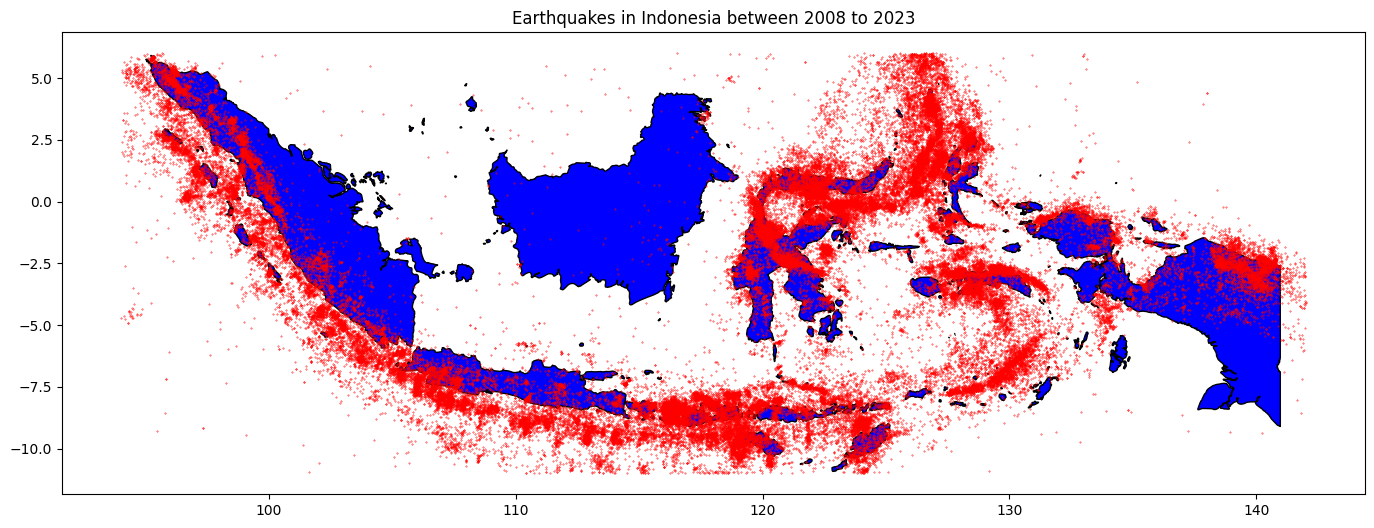

In [22]:
# create geospatial data frame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326")

# load dataset onto map
fig, ax = plt.subplots(figsize=(20,6))
indonesia.plot(ax=ax, color="blue", edgecolor="black")
gdf.plot(ax=ax, marker="o", color="red", markersize=0.1).set_title("Earthquakes in Indonesia between 2008 to 2023")
plt.show()


As shown on the map above, earthquakes in Indonesia are concentrated in the islands of Sumatra, Java, Papua, and Sulawesi. The island of Borneo (Kalimantan region) experiences notably fewer earthquakes. According to [BMKG](https://en.tempo.co/read/1662220/kalimantan-rarely-jolted-by-earthquake-bmkg-explains-why), Indonesia's meteorology, climatology, and geophysics agency, this is because Kalimantan is located far from plate collisions that generate earthquakes and lacks active volcanoes. While this map provides a basic overview of earthquake distribution, the following maps will offer more detailed analysis.

#### All earthquakes by magnitude

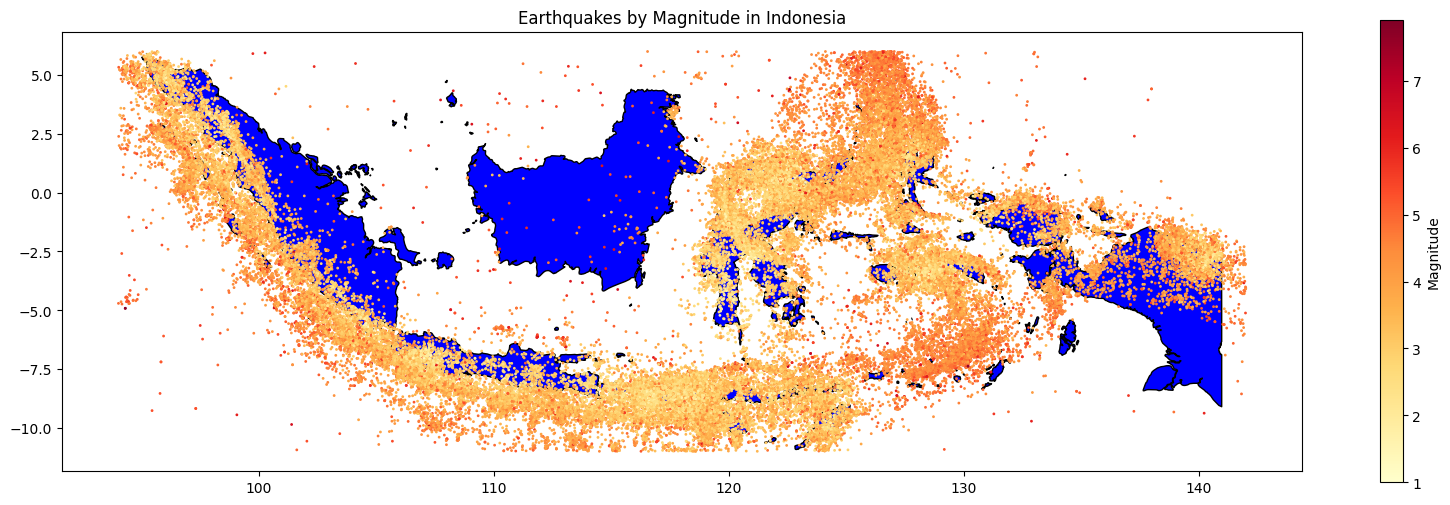

In [23]:
fig, ax = plt.subplots(figsize=(20,6))
indonesia.plot(ax=ax, color="blue", edgecolor="black")
gdf.plot(ax=ax, marker="o", cmap="YlOrRd", column=df["magnitude"], markersize=1, legend=True, legend_kwds={"label": "Magnitude"}).set_title("Earthquakes by Magnitude in Indonesia")
plt.show()

The map above displays earthquakes color-coded by magnitude, with redder colors indicating higher magnitudes and yellower colors indicating lower magnitudes. The Java region predominantly experiences lower magnitude earthquakes (2-3 magnitude), while the Bali, West Nusa Tenggara, and East Nusa Tenggara provinces experience higher magnitude earthquakes (averaging 4-5 magnitude).

#### All earthquakes by depth

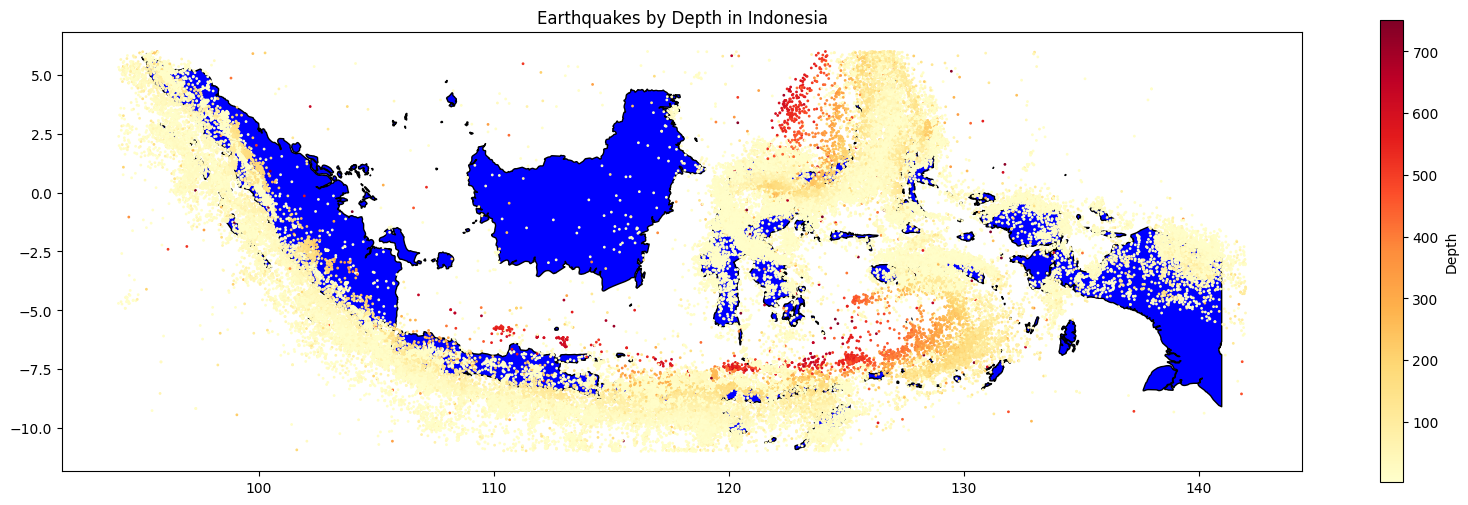

In [26]:
fig, ax = plt.subplots(figsize=(20,6))
indonesia.plot(ax=ax, color="blue", edgecolor="black")
gdf.plot(ax=ax, marker="o", cmap="YlOrRd", column=df["depth"], markersize=1, legend=True, legend_kwds={"label": "Depth"}).set_title("Earthquakes by Depth in Indonesia")
plt.show()

Most earthquakes in Indonesia occur at relatively shallow depths, typically below 100km. However, there is one particular area above Sulawesi island, also known as the Celebes Sea, where earthquakes occur at much greater depths, ranging from 500 to as much as 700 km.

#### Closest and Farthest Earthquake from Center